In [1]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

In [2]:
df_wx = pd.read_csv('wx_user.csv')

In [3]:
df_wx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738066 entries, 0 to 738065
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      738066 non-null  int64  
 1   follow_time  738066 non-null  object 
 2   auth_time    730518 non-null  object 
 3   createtime   738066 non-null  object 
 4   order_no     700123 non-null  float64
 5   paid_cash    700123 non-null  float64
 6   create_date  700123 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 39.4+ MB


In [4]:
df_wx.head()

,user_id,follow_time,auth_time,createtime,order_no,paid_cash,create_date
0,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018123e+14,1.0,2018/12/29
1,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.021012e+14,50.0,2021/1/15
2,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018110e+14,1.0,2018/11/2
3,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018122e+14,1.0,2018/12/23
4,2,2023/3/9 14:36:14,2014/8/3 22:39:25,2014/4/30 09:30:23,2.018121e+14,1.0,2018/12/7


In [5]:
import datetime as dt

# 转化日期
df_wx['create_date'] = pd.to_datetime(df_wx['create_date'])

#设定日期为今天
anchorDate = dt.datetime(2023,9,20)

In [6]:
# 计算 RFM 值

rfm = df_wx.groupby('user_id').agg({
    'create_date': lambda x: (anchorDate - x.max()).days,
    'order_no': 'count',
    'paid_cash': 'sum'
}).rename(columns={
    'create_date': 'Recency',
    'order_no': 'Frequency',
    'paid_cash': 'Monetary'
    
})

In [7]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110679 entries, 2 to 762684
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Recency    72736 non-null   float64
 1   Frequency  110679 non-null  int64  
 2   Monetary   110679 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.4 MB


In [8]:
rfm.head()

,Recency,Frequency,Monetary
user_id,,,
2,48.0,179,21481.93
6,130.0,8,1118.01
7,923.0,11,601.00
11,701.0,15,7225.36
13,176.0,24,2421.00


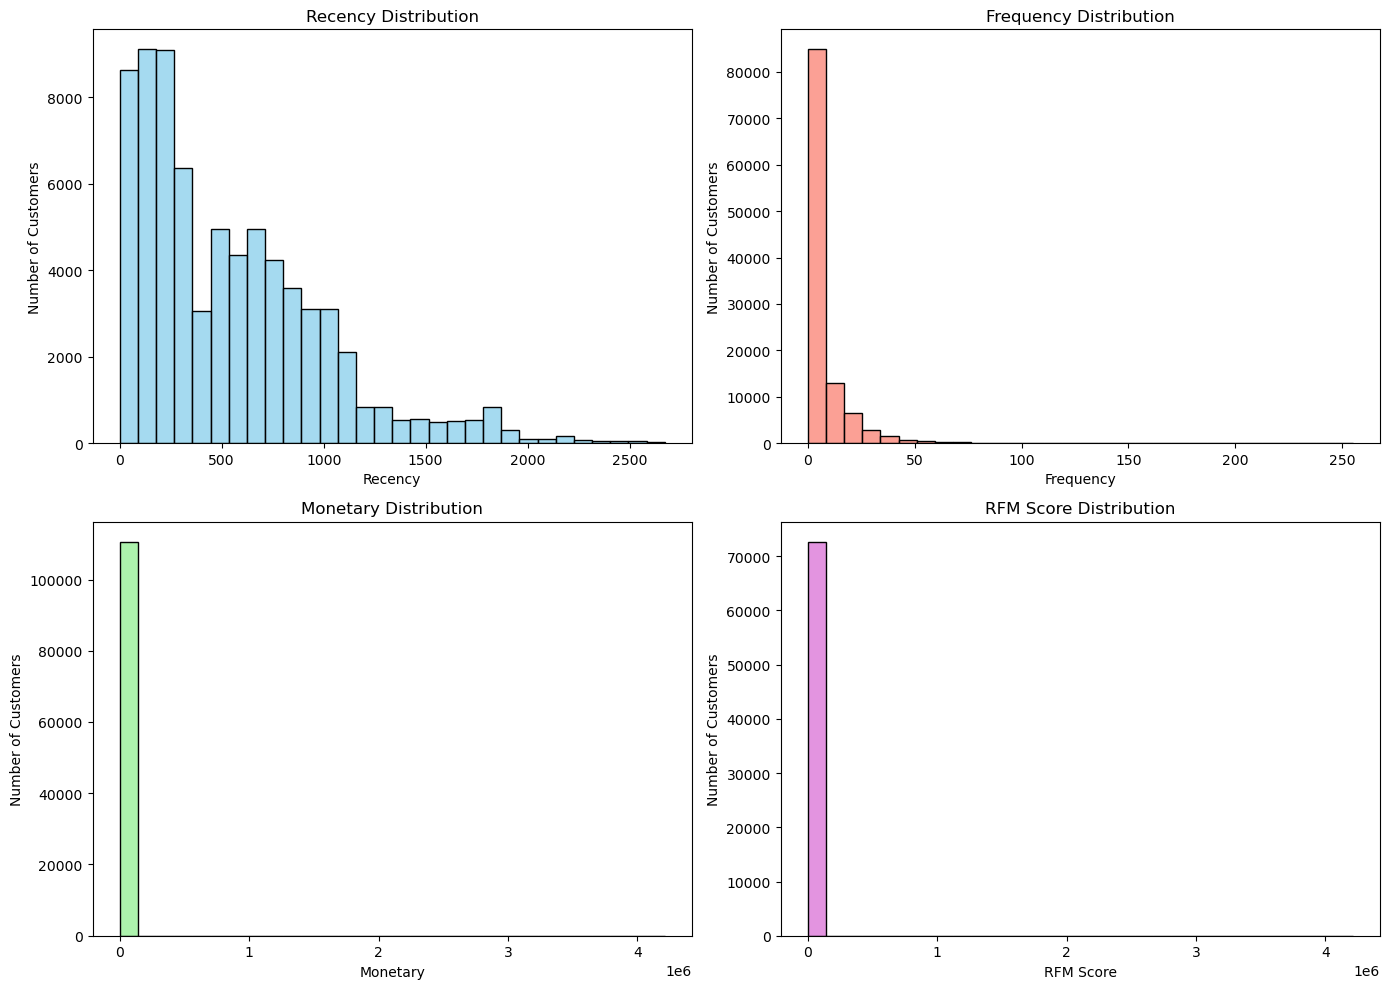

In [9]:
# 创建图形
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Recency分布图
sns.histplot(rfm['Recency'], kde=False, ax=ax[0, 0], bins=30, color='skyblue')
ax[0, 0].set_title('Recency Distribution')
ax[0, 0].set_xlabel('Recency')
ax[0, 0].set_ylabel('Number of Customers')

# Frequency分布图
sns.histplot(rfm['Frequency'], kde=False, ax=ax[0, 1], bins=30, color='salmon')
ax[0, 1].set_title('Frequency Distribution')
ax[0, 1].set_xlabel('Frequency')
ax[0, 1].set_ylabel('Number of Customers')

# Monetary分布图
sns.histplot(rfm['Monetary'], kde=False, ax=ax[1, 0], bins=30, color='lightgreen')
ax[1, 0].set_title('Monetary Distribution')
ax[1, 0].set_xlabel('Monetary')
ax[1, 0].set_ylabel('Number of Customers')

# RFM得分分布图 (需要计算RFM得分)
rfm['RFM_Score'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']
sns.histplot(rfm['RFM_Score'], kde=False, ax=ax[1, 1], bins=30, color='orchid')
ax[1, 1].set_title('RFM Score Distribution')
ax[1, 1].set_xlabel('RFM Score')
ax[1, 1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [10]:
# 获取总金额最大的 TOP50 数据
top_50_data = rfm.sort_values(by='Monetary', ascending=False).head(50)
top_50_data


,Recency,Frequency,Monetary,RFM_Score
user_id,,,,
102589,624.0,230,4210476.80,4211330.80
519994,169.0,46,2007926.01,2008141.01
1634,2.0,147,1482328.10,1482477.10
18771,12.0,44,1319760.80,1319816.80
434,121.0,28,1108521.42,1108670.42
95509,1.0,35,755383.00,755419.00
160430,147.0,6,733292.21,733445.21
36481,103.0,47,674969.02,675119.02
478222,173.0,16,666782.00,666971.00


In [11]:
filtered_df_wx = df_wx[(df_wx['paid_cash'] >= 99) & (df_wx['paid_cash'] < 20000)]

# 使用过滤后的数据进行聚合
rfm = filtered_df_wx.groupby('user_id').agg({
    'create_date': lambda x: (anchorDate - x.max()).days,
    'order_no': 'count',
    'paid_cash': 'sum'
}).rename(columns={
    'create_date': 'Recency',
    'order_no': 'Frequency',
    'paid_cash': 'Monetary'
})

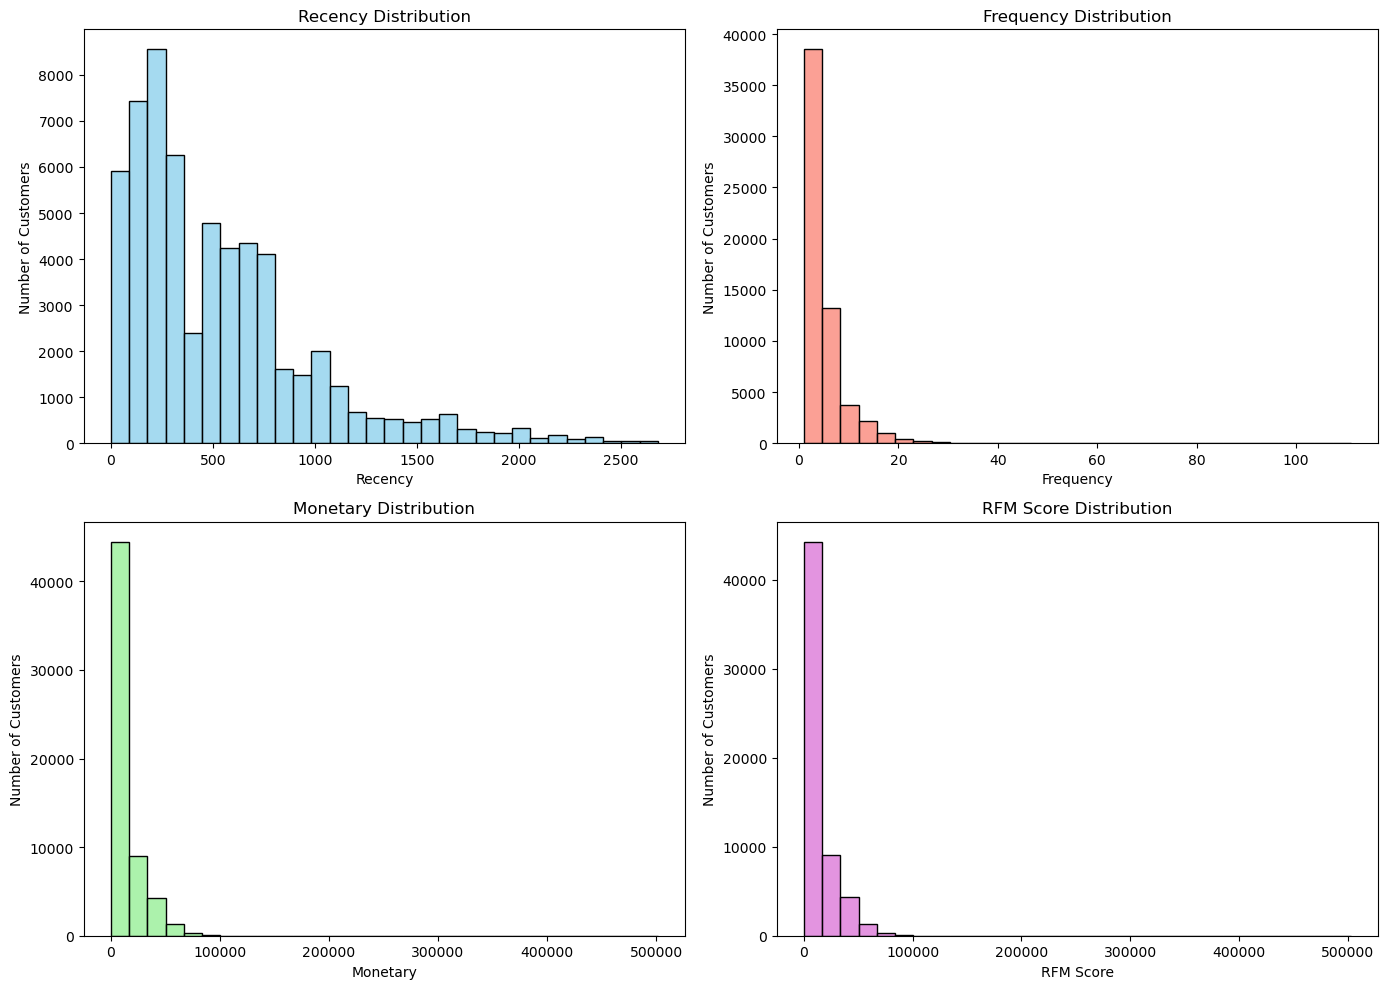

In [12]:
# 创建图形
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Recency分布图
sns.histplot(rfm['Recency'], kde=False, ax=ax[0, 0], bins=30, color='skyblue')
ax[0, 0].set_title('Recency Distribution')
ax[0, 0].set_xlabel('Recency')
ax[0, 0].set_ylabel('Number of Customers')

# Frequency分布图
sns.histplot(rfm['Frequency'], kde=False, ax=ax[0, 1], bins=30, color='salmon')
ax[0, 1].set_title('Frequency Distribution')
ax[0, 1].set_xlabel('Frequency')
ax[0, 1].set_ylabel('Number of Customers')

# Monetary分布图
sns.histplot(rfm['Monetary'], kde=False, ax=ax[1, 0], bins=30, color='lightgreen')
ax[1, 0].set_title('Monetary Distribution')
ax[1, 0].set_xlabel('Monetary')
ax[1, 0].set_ylabel('Number of Customers')

# RFM得分分布图 (需要计算RFM得分)
rfm['RFM_Score'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']
sns.histplot(rfm['RFM_Score'], kde=False, ax=ax[1, 1], bins=30, color='orchid')
ax[1, 1].set_title('RFM Score Distribution')
ax[1, 1].set_xlabel('RFM Score')
ax[1, 1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In [13]:
# 数据预处理
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# 使用优化的参数进行聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=660,
    min_samples=2, 
    metric='euclidean', 
    cluster_selection_epsilon=0.18, 
    alpha=3.5, 
    cluster_selection_method='eom', 
    algorithm='best')
clusterer.fit(rfm_scaled)
rfm['Cluster'] = pd.Series(clusterer.labels_, index=rfm.index)

# 查看结果
print(rfm['Cluster'].value_counts())

 4     13286
 10    11311
 12     7423
 11     5737
 9      4506
 8      3480
 7      2859
-1      2722
 6      2110
 2      1561
 5      1511
 3      1165
 1       954
 0       913
Name: Cluster, dtype: int64


IndexError: list index out of range

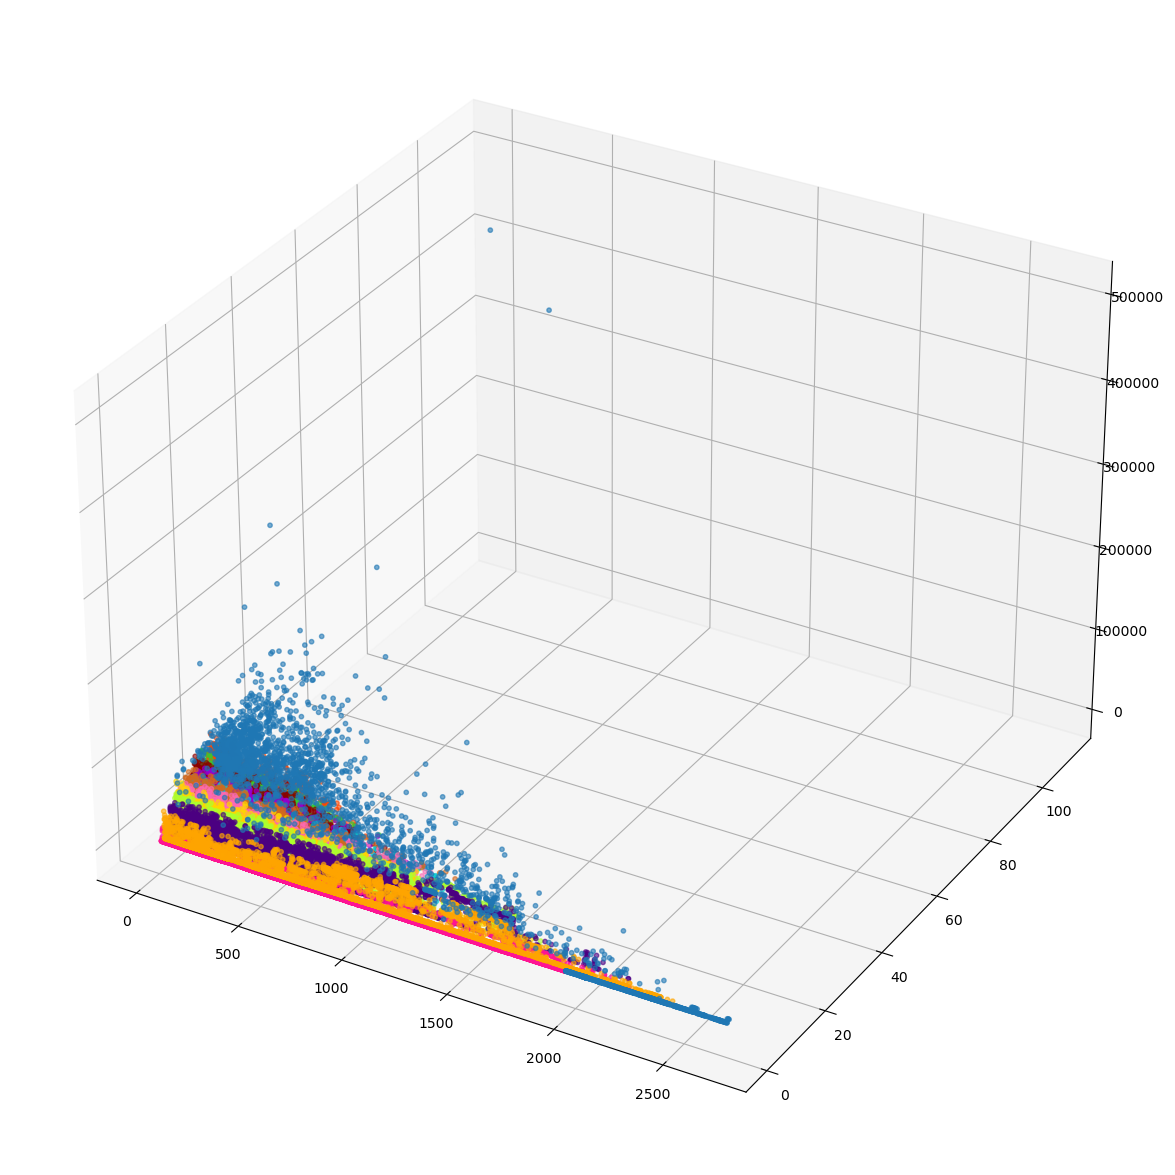

In [14]:
# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700",
    "#adff2f", "#ffa500", "#4b0082"
]

# 进一步增加透明度
alpha_value = 0.6

# 保持点的大小
sizes = {cluster: 10 for cluster in rfm['Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(rfm['Cluster'].unique())):
    dx.scatter(rfm[rfm.Cluster == label].Recency,
               rfm[rfm.Cluster == label].Frequency,
               rfm[rfm.Cluster == label].Monetary,
               c=[colors[i]],
               label='Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('Recency', fontsize=16)
dx.set_ylabel('Frequency', fontsize=16)
dx.set_zlabel('Monetary', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格
plt.show()

In [15]:
filtered_rfm = rfm[rfm['Monetary'] < 50000].copy()

In [16]:
# 数据预处理
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(filtered_rfm[['Recency', 'Frequency', 'Monetary']])

# 使用优化的参数进行聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=1000,
    min_samples=2, 
    metric='euclidean', 
    cluster_selection_epsilon=0.18, 
    alpha=3.5, 
    cluster_selection_method='eom', 
    algorithm='best')
clusterer.fit(rfm_scaled)
filtered_rfm['Cluster'] = pd.Series(clusterer.labels_, index=filtered_rfm.index)

# 查看结果
print(filtered_rfm['Cluster'].value_counts())

 6     13940
 7     11325
 10     7443
 9      5741
 8      4509
 5      3461
 4      2834
-1      2476
 3      2065
 2      1441
 0      1377
 1      1074
Name: Cluster, dtype: int64


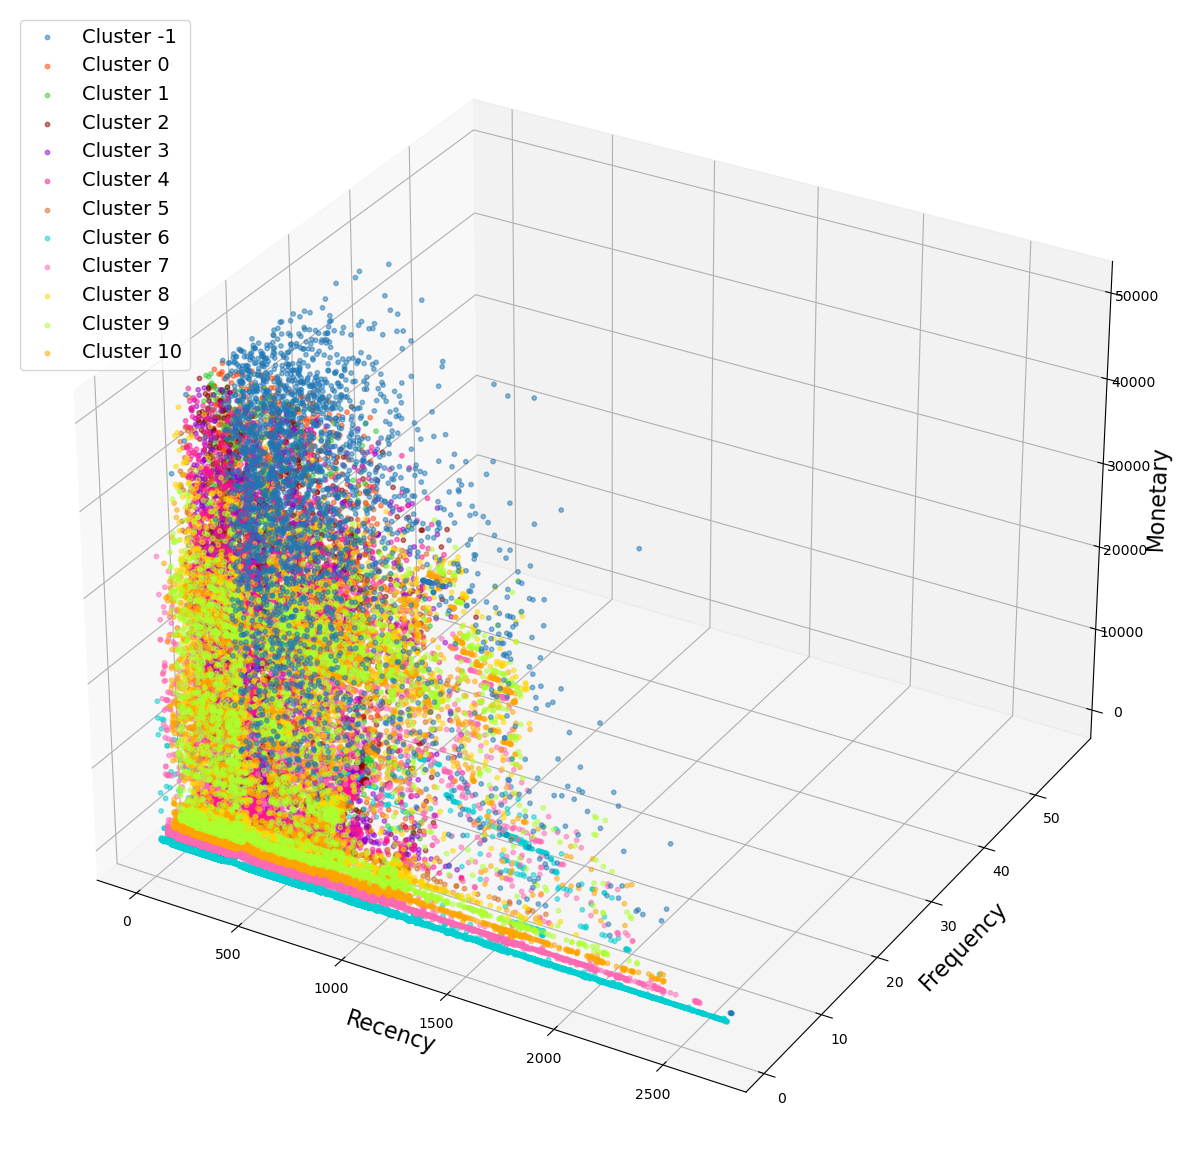

In [17]:
# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700",
    "#adff2f", "#ffa500", "#4b0082"
]

# 进一步增加透明度
alpha_value = 0.5

# 保持点的大小
sizes = {cluster: 10 for cluster in filtered_rfm['Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(filtered_rfm['Cluster'].unique())):
    dx.scatter(filtered_rfm[filtered_rfm.Cluster == label].Recency,
               filtered_rfm[filtered_rfm.Cluster == label].Frequency,
               filtered_rfm[filtered_rfm.Cluster == label].Monetary,
               c=[colors[i]],
               label='Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('Recency', fontsize=16)
dx.set_ylabel('Frequency', fontsize=16)
dx.set_zlabel('Monetary', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Step 1: Data preprocessing 
rfm_values = filtered_rfm[['Recency', 'Frequency', 'Monetary']].values
rfm_scaled_values = scaler.transform(rfm_values)

# Step 2: Run K-means clustering
k = 5 # 此处是为了简化演示处理，便临时取值为5
kmeans = KMeans(n_clusters=k, random_state=42)
filtered_rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled_values)

# Step 3: Evaluate the clusters
silhouette_avg = silhouette_score(rfm_scaled_values, filtered_rfm['KMeans_Cluster'])

# Cluster counts and silhouette score
cluster_counts = filtered_rfm['KMeans_Cluster'].value_counts()
cluster_counts, silhouette_avg

C:\Users\EDY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(4    22061
 1    17528
 0     9710
 3     4274
 2     4113
 Name: KMeans_Cluster, dtype: int64,
 0.3776129814293183)

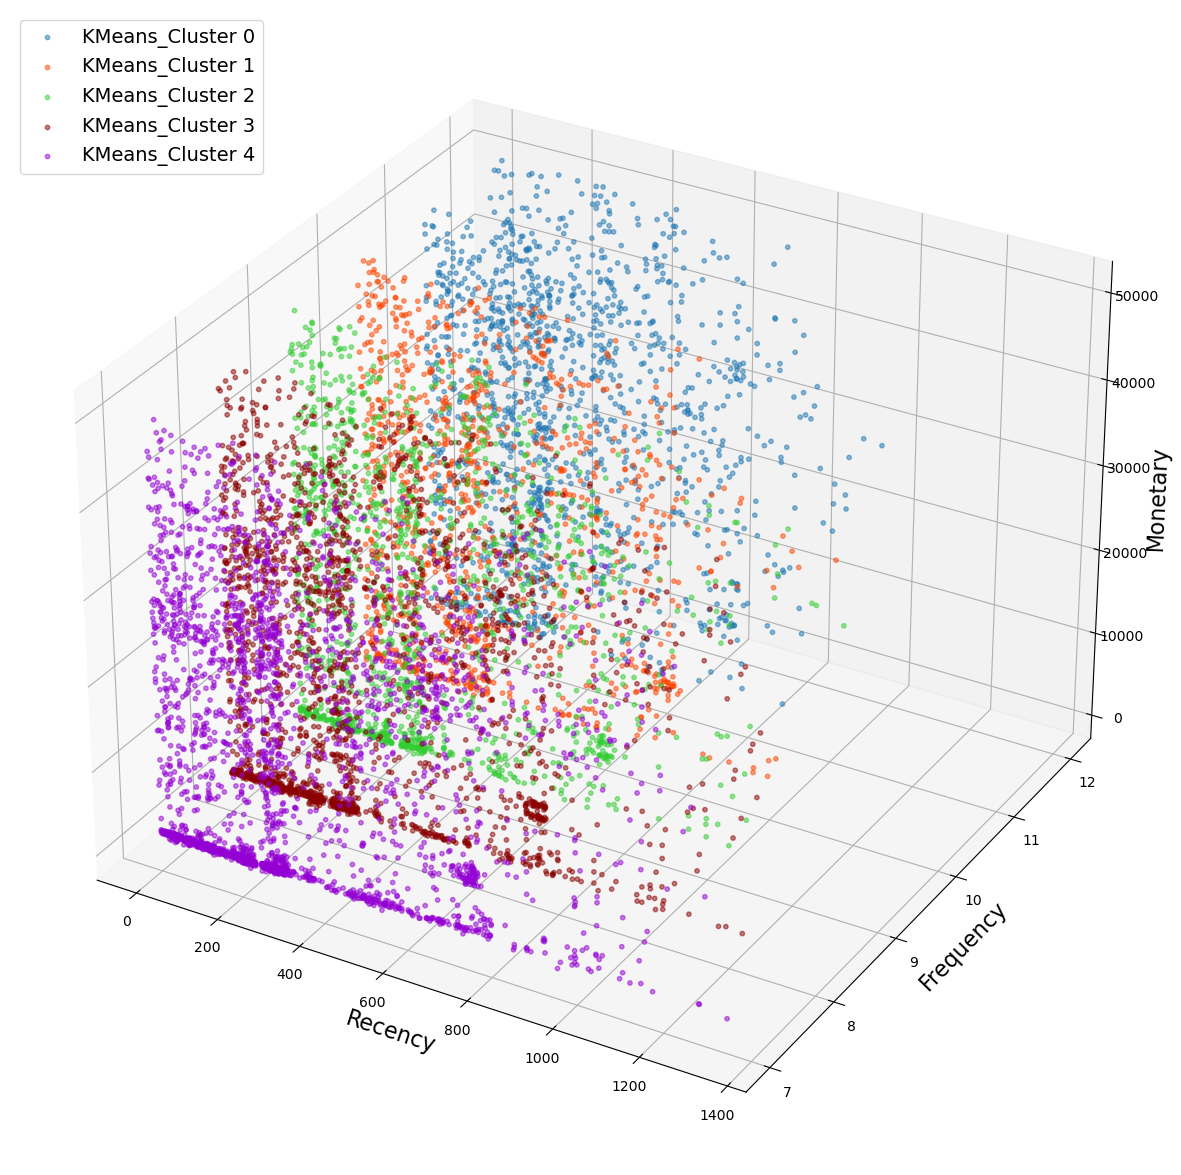

In [19]:
# 对KMeans结果进行3D可视化处理

# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700",
    "#adff2f", "#ffa500", "#4b0082"
]

# 进一步增加透明度
alpha_value = 0.5

# 保持点的大小
sizes = {cluster: 10 for cluster in filtered_rfm['KMeans_Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(filtered_rfm['KMeans_Cluster'].unique())):
    dx.scatter(filtered_rfm[filtered_rfm.Cluster == label].Recency,
               filtered_rfm[filtered_rfm.Cluster == label].Frequency,
               filtered_rfm[filtered_rfm.Cluster == label].Monetary,
               c=[colors[i]],
               label='KMeans_Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('Recency', fontsize=16)
dx.set_ylabel('Frequency', fontsize=16)
dx.set_zlabel('Monetary', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格
plt.show()

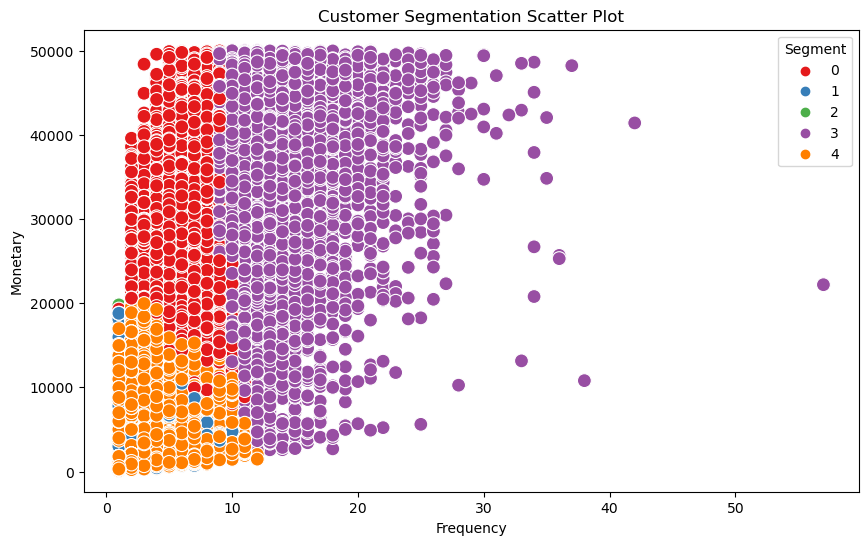

In [20]:
# Create a scatter plot with color-coding for segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    y='Monetary',
    x='Frequency',
    hue='KMeans_Cluster',
    data=filtered_rfm,
    palette='Set1',  
    s=100,  
)
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Segment', loc='upper right')
plt.show()

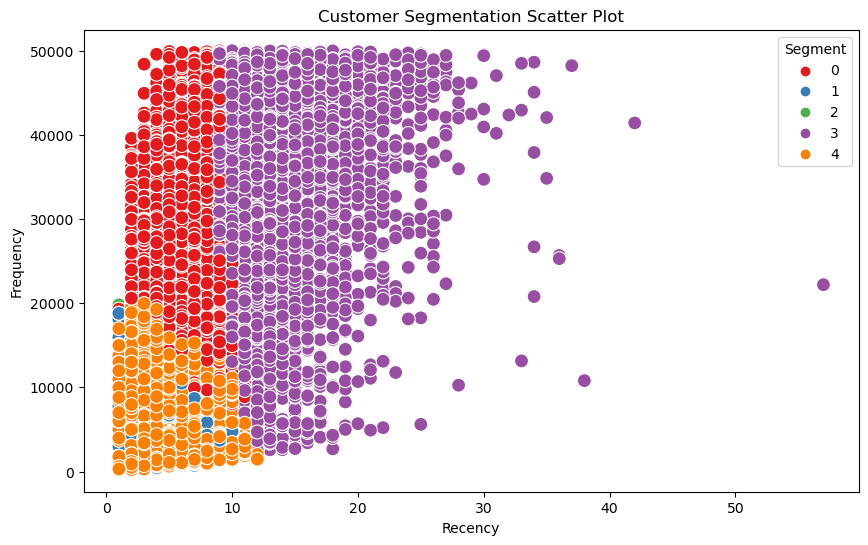

In [21]:
# Create a scatter plot with color-coding for segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    y='Monetary',
    x='Frequency',
    hue='KMeans_Cluster',
    data=filtered_rfm,
    palette='Set1',  
    s=100,  
)
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment', loc='upper right')
plt.show()

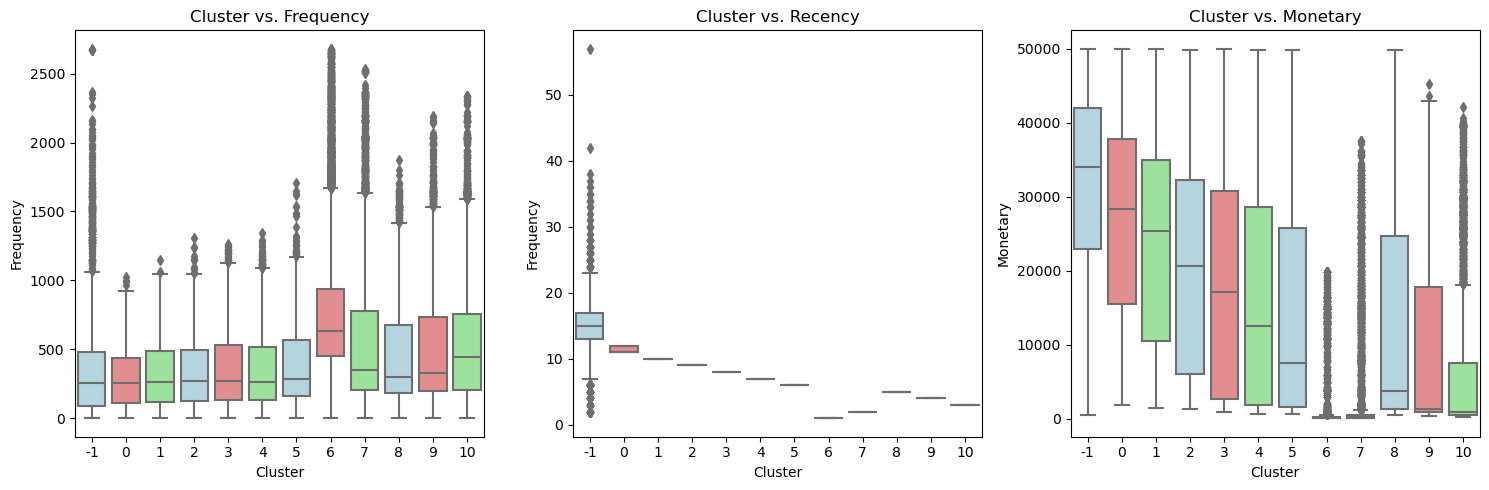

In [22]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Custom colors for the bars
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Boxplot of Cluster vs. Recency
sns.boxplot(x='Cluster', y='Recency', data=filtered_rfm, ax=axes[0], palette=colors)
axes[1].set_title('Cluster vs. Recency')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Recency')

# Boxplot of Cluster vs. Frequency
sns.boxplot(x='Cluster', y='Frequency', data=filtered_rfm, ax=axes[1], palette=colors)
axes[0].set_title('Cluster vs. Frequency')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Frequency')

# Boxplot of Cluster vs. Monetary
sns.boxplot(x='Cluster', y='Monetary', data=filtered_rfm, ax=axes[2], palette=colors)
axes[2].set_title('Cluster vs. Monetary')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary')

# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()